In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam


In [4]:
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
%matplotlib inline 

In [5]:
import librosa
adudio_file_path = "C://Users//oskar//Masaüstü//yeni//globalai7//audio//fold3//6988-5-0-2.wav"
librosa_audio_data,librosa_sample_rate =librosa.load(adudio_file_path)


In [6]:
librosa_audio_data.shape

(88200,)

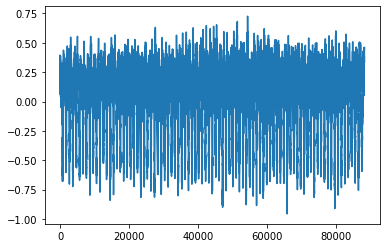

In [7]:
plt.plot(librosa_audio_data)


In [8]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)

In [9]:
mfccs.shape

(40, 173)

In [10]:
audio_dataset_path = "C:\\Users\\oskar\\Masaüstü\\yeni\\globalai7\\audio"
metadata = pd.read_csv("UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
from email.mime import audio


def feature_extractor(file):
    audio,sample_rate = librosa.load(file_name,res_type="kaiser_fast")
    mfcss_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfcss_features.T,axis=0)
    
    return mfccs_scaled_features

In [12]:
extracted_features = []

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),"fold"+str(row["fold"])+"\\" +str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    

3553it [02:26, 23.71it/s]c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [05:33, 34.18it/s]c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [05:48, 25.05it/s]


In [13]:
extracted_features_df = pd.DataFrame(extracted_features, columns =["features","class"])
extracted_features_df.head()

,features,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [14]:
x = np.array(extracted_features_df["features"].tolist())
y = np.array(extracted_features_df["class"].tolist())


In [15]:
x.shape

(8732, 40)

In [16]:
labelencoder = LabelEncoder()
y= to_categorical(labelencoder.fit_transform(y))


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=3)

In [18]:
num_labels = 10

In [19]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(125,input_shape=(40,),activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(250,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(125,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(num_labels,activation='softmax'))


In [20]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")


In [21]:
results = model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
219/219 [==============================] - 2s 4ms/step - loss: 9.5565 - accuracy: 0.1233 - val_loss: 2.2807 - val_accuracy: 0.1380
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 2.4976 - accuracy: 0.1339 - val_loss: 2.2097 - val_accuracy: 0.1557
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2525 - accuracy: 0.1645 - val_loss: 2.1193 - val_accuracy: 0.2078
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 2.1780 - accuracy: 0.1937 - val_loss: 2.0828 - val_accuracy: 0.1958
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 2.1293 - accuracy: 0.2129 - val_loss: 1.9812 - val_accuracy: 0.2559
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 2.0608 - accuracy: 0.2329 - val_loss: 1.9257 - val_accuracy: 0.2856
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 1.9994 - accuracy: 0.2568 - val_loss: 1.8987 - val_accuracy: 0.3188

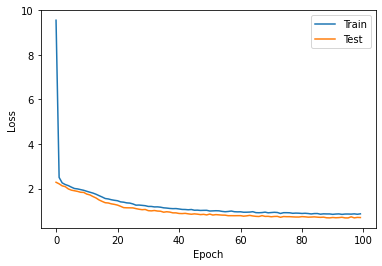

In [22]:
plt.plot(results.history["loss"],label="Train")
plt.plot(results.history["val_loss"],label="Test")

plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [23]:
val_test_accuracy = model.evaluate(x_test,y_test)
val_test_accuracy

55/55 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.7773


[0.6964278221130371, 0.7773325443267822]

In [24]:
test_result = model.test_on_batch(x_test,y_test)
test_result

[0.6964277625083923, 0.7773325443267822]